# HSSM Tutorial

This notebook demonstrates how to use the HSSM class to create hierarchical models. The tutorial will be based on simulated data from the [SSM Simulators (SSMS)](https://github.com/AlexanderFengler/ssms) package.

In [75]:
import arviz as az
import numpy as np
import pandas as pd
import pytensor

import hssm
import ssms.basic_simulators

pytensor.config.floatX = "float32"

## Simulating a dataset
-  `dataset` passed to the model should always include 'rt' and 'response'.
-  `dataset` should be a pandas dataframe.

In [76]:
# Simulate some data
v_true, a_true, z_true, t_true, sv_true = [0.5, 1.5, 0.5, 0.5, 0.0]
obs_ddm = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, sv_true], model="ddm", n_samples=1000
)
obs_ddm = np.column_stack([obs_ddm["rts"][:, 0], obs_ddm["choices"][:, 0]])
dataset = pd.DataFrame(obs_ddm, columns=["rt", "response"])

dataset

,rt,response
0,2.077018,1.0
1,2.353031,1.0
2,1.924011,1.0
3,1.585995,-1.0
4,1.887009,1.0
...,...,...
995,2.715022,1.0
996,1.088996,1.0
997,4.154918,1.0
998,3.893936,1.0


## The simplest case
### DDM using the analytical likelihood function from Navarro & Fuss (2009)

#### Analytical model
Simplest usage of HSSM, only data needs to be provided.

In [77]:
simple_ddm_model = hssm.HSSM(data=dataset)
simple_ddm_model

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

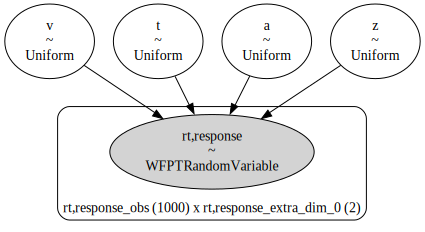

In [78]:
simple_ddm_model.graph()

In [79]:
simple_ddm_model.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 975 seconds.
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_tr

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: Us

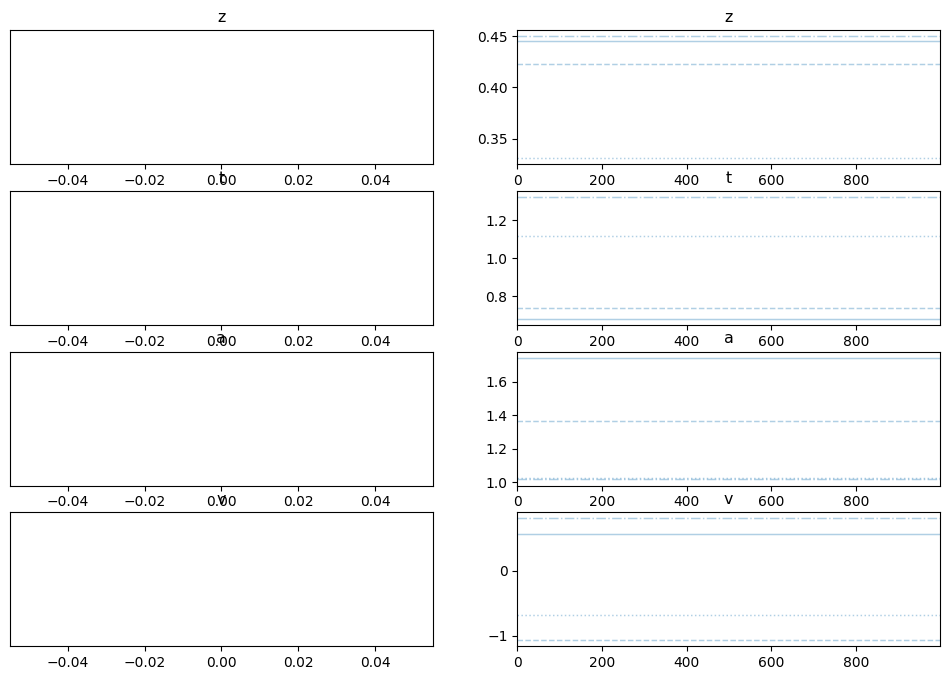

In [80]:
az.plot_trace(simple_ddm_model.traces);

In [81]:
az.summary(simple_ddm_model.traces)

/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/diagnostics.py:584: RuntimeWarning: divide by zero encoun

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.412,0.048,0.331,0.450,0.024,0.018,4.0,4.0,inf
t,0.965,0.264,0.683,1.321,0.132,0.101,4.0,4.0,inf
a,1.288,0.298,1.017,1.742,0.148,0.113,4.0,4.0,inf
v,-0.098,0.795,-1.067,0.804,0.396,0.303,4.0,4.0,inf


## One step up: An angle model using an approximation network

#### Simulating Angle Data

In [82]:
# Simulate some data
v_true, a_true, z_true, t_true, theta_true = [0.5, 1.5, 0.5, 0.5, 0.3]
obs_angle = ssms.basic_simulators.simulator(
    [v_true, a_true, z_true, t_true, theta_true], model="angle", n_samples=1000
)
obs_angle = np.column_stack([obs_angle["rts"][:, 0], obs_angle["choices"][:, 0]])
dataset_lan = pd.DataFrame(obs_angle, columns=["rt", "response"])
dataset_lan

,rt,response
0,1.468991,1.0
1,1.586995,1.0
2,2.132020,1.0
3,2.472036,1.0
4,1.912010,1.0
...,...,...
995,1.846007,-1.0
996,1.242994,1.0
997,2.686024,-1.0
998,1.118996,1.0


This creates a default angle model using pytensor

In [83]:
angle_model = hssm.HSSM(data=dataset_lan, model="angle")
angle_model

Hierarchical Sequential Sampling Model
Model: angle

Response variable: rt,response
Observations: 1000

Parameters:

v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
a ~ Uniform(lower: 0.30000001192092896, upper: 3.0)	bounds: (0.3, 3.0)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0010000000474974513, upper: 2.0)	bounds: (0.001, 2.0)
theta ~ Uniform(lower: -0.10000000149011612, upper: 1.2999999523162842)	bounds: (-0.1, 1.3)

In [84]:
pytensor.config.floatX = "float32"

angle_model.sample(cores=1, draws=500, tune=500, mp_ctx="forkserver")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, t, z, a, v]


Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 53 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

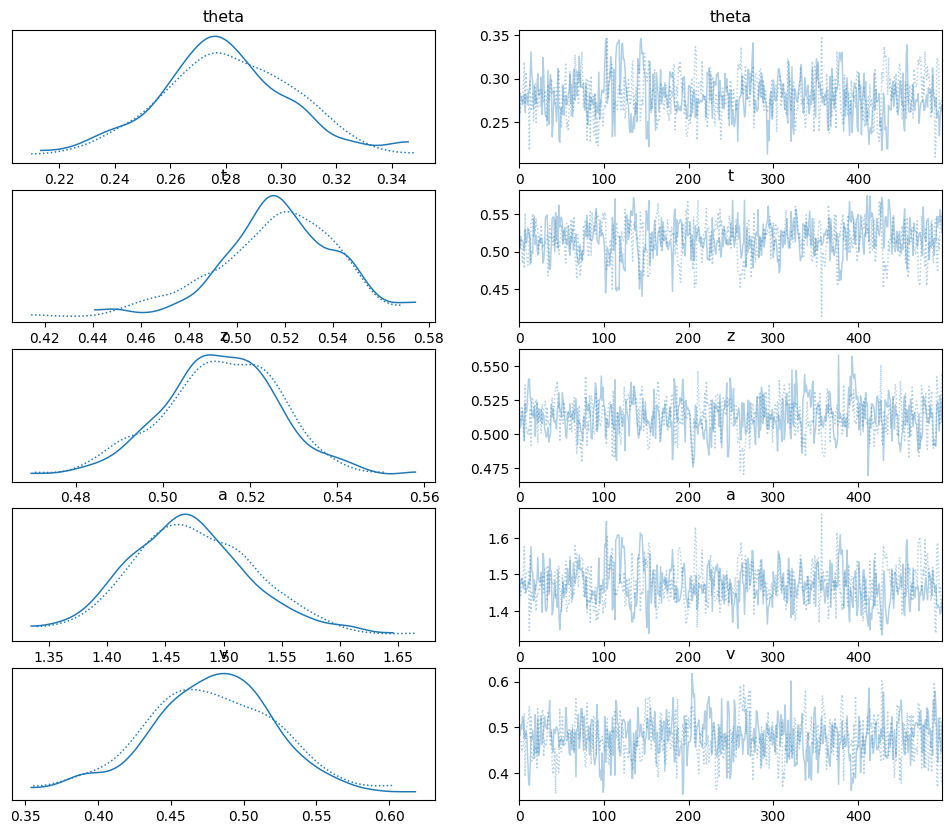

In [85]:
az.plot_trace(angle_model.traces);

#### Sampling the angle model using jax

In [86]:
from jax.config import config

config.update("jax_enable_x64", False)

angle_model.sample(sampler="nuts_numpyro")

Compiling...


/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/pymc/sampling/jax.py:641: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  pmap_numpyro = MCMC(
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


Compilation time =  0:00:01.319211
Sampling...


sample: 100%|██████████| 2000/2000 [00:36<00:00, 54.25it/s, 23 steps of size 1.90e-01. acc. prob=0.96]
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)
sample: 100%|██████████| 2000/2000 [00:24<00:00, 80.60it/s, 7 steps of size 2.59e-01. acc. prob=0.92] 
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/jax/_src/numpy/array_methods.py:795: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the

Sampling time =  0:01:59.733373
Transforming variables...
Transformation time =  0:00:00.040618


Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [87]:
az.summary(angle_model.traces)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.282,0.024,0.236,0.328,0.001,0.000,1597.0,1840.0,1.0
t,0.516,0.022,0.474,0.559,0.001,0.000,1756.0,1818.0,1.0
z,0.513,0.013,0.488,0.536,0.000,0.000,1856.0,1884.0,1.0
a,1.475,0.051,1.379,1.571,0.001,0.001,1524.0,1905.0,1.0
v,0.477,0.041,0.395,0.550,0.001,0.001,1909.0,2269.0,1.0


### Using include paramater to use regression and update priors.

#### Case 1: Regression type formula. 

In [88]:
# get some fake simulation data
intercept = 0.3
x = np.random.uniform(0.5, 0.2, size=1000)
y = np.random.uniform(0.4, 0.1, size=1000)

v = intercept + 0.8 * x + 0.3 * y

In [89]:
true_values = np.column_stack(
    [v, np.repeat([[1.5, 0.5, 0.5, 0.0]], axis=0, repeats=1000)]
)
true_values.shape

(1000, 5)

In [90]:
obs_ddm_reg_v = ssms.basic_simulators.simulator(true_values, model="ddm", n_samples=1)
obs_ddm_reg_v

dataset_reg_v = pd.DataFrame(
    {
        "rt": obs_ddm_reg_v["rts"].flatten(),
        "response": obs_ddm_reg_v["choices"].flatten(),
        "x": x,
        "y": y,
    }
)

dataset_reg_v

,rt,response,x,y
0,2.233025,1,0.371538,0.391648
1,2.024015,1,0.352949,0.160655
2,0.936998,1,0.216393,0.342346
3,2.879010,1,0.301751,0.221042
4,2.956004,1,0.216896,0.358378
...,...,...,...,...
995,1.292993,1,0.460233,0.117279
996,2.886009,1,0.378629,0.128300
997,1.125996,1,0.377495,0.137177
998,2.005014,1,0.412645,0.129289


- v is parent
- x is a feature from the dataset_reg_v
- y is a feature from the dataset_reg_v

In [91]:
model_reg_v = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": 0.0, "upper": 0.5},
                "x": {"name": "Uniform", "lower": 0.0, "upper": 1.0},
                "y": {"name": "Uniform", "lower": 0.0, "upper": 1.0},
            },
            "formula": "v ~ 1 + x + y",
            "link": "identity",
        }
    ],
)
model_reg_v

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ 1 + x + y
	Link: identity
	bounds: (-3.0, 3.0)
	Intercept ~ Uniform(lower: 0.0, upper: 0.5)
	x ~ Uniform(lower: 0.0, upper: 1.0)
	y ~ Uniform(lower: 0.0, upper: 1.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

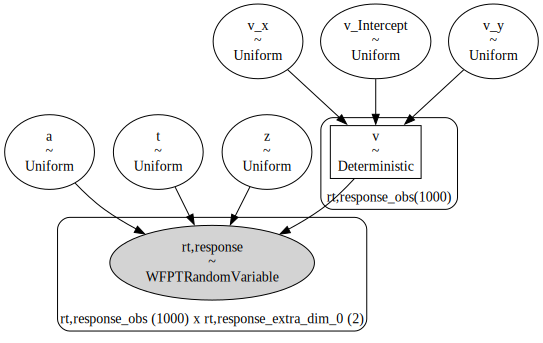

In [92]:
model_reg_v.graph()

In [57]:
trace_reg_v = model_reg_v.sample()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 993 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v_Intercept, v_x, v_y]


/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
/Users/aomar7/Library/Caches/pypoetry/virtualenvs/hssm-t7Cza8gi-py3.11/lib/python3.11/site-packages/arviz/stats/density_utils.py:487: Us

array([[<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 'v_Intercept'}>,
        <Axes: title={'center': 'v_Intercept'}>],
       [<Axes: title={'center': 'v_x'}>, <Axes: title={'center': 'v_x'}>],
       [<Axes: title={'center': 'v_y'}>, <Axes: title={'center': 'v_y'}>]],
      dtype=object)

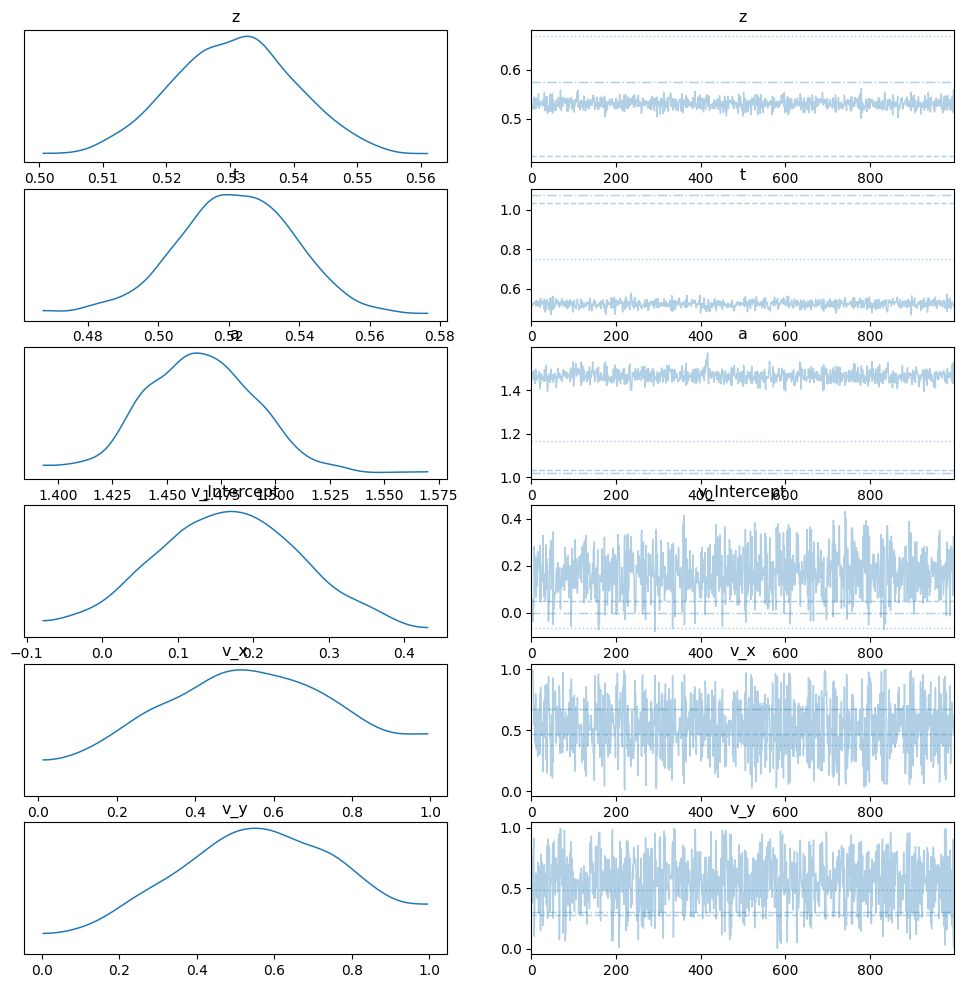

In [58]:
az.plot_trace(model_reg_v.traces)

In [59]:
# Looks like parameter recovery was successful
az.summary(model_reg_v.traces)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.549,0.088,0.423,0.668,0.044,0.034,4.0,4.0,9.40
t,0.846,0.225,0.511,1.077,0.112,0.086,4.0,31.0,3.99
a,1.171,0.180,1.019,1.483,0.089,0.068,4.0,4.0,4.00
v_Intercept,0.038,0.097,-0.064,0.237,0.042,0.032,5.0,4.0,2.71
v_x,0.513,0.159,0.236,0.814,0.054,0.040,10.0,28.0,1.91
v_y,0.406,0.161,0.258,0.802,0.059,0.044,7.0,5.0,2.41


#### Case 2: adding initval to priors along with lower and upper.

- v is a parent
- x is a feature from the dataset_reg_v

Adding initval is optional.

In [60]:
hssm_include_val = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": -3.0,
                    "upper": 3.0,
                    "initval": 1.0,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "v ~ 1 + x",
        }
    ],
)

In [61]:
hssm_include_val

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

v ~ 1 + x
	Link: identity
	bounds: (-3.0, 3.0)
	Intercept ~ Uniform(lower: -3.0, upper: 3.0, initval: 1.0)
	x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0)
sv = 0.0
a ~ Uniform(lower: 0.30000001192092896, upper: 2.5)	bounds: (0.3, 2.5)
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

In [62]:
samples_two = hssm_include_val.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, a, v_Intercept, v_x]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 923 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [63]:
az.summary(samples_two)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.413,0.046,0.364,0.496,0.022,0.017,4.0,4.0,3.99
t,0.718,0.144,0.471,0.873,0.072,0.055,4.0,30.0,3.99
a,1.210,0.217,0.919,1.529,0.108,0.083,4.0,4.0,3.99
v_Intercept,0.708,0.825,-0.186,2.051,0.410,0.314,4.0,4.0,9.40
v_x,0.098,0.180,-0.116,0.448,0.083,0.063,5.0,4.0,2.55


#### Case 3: not specifying parent v in the include parameter. 

The parent is v by default, specifying it is not mandatory. 

In [64]:
hssm_include_val = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "a",  # change to name
            "prior": {
                "Intercept": {
                    "name": "Uniform",
                    "lower": 0.0,
                    "upper": 1.0,
                    "initval": 0.5,
                },
                "x": {"name": "Uniform", "lower": -0.5, "upper": 0.5, "initval": 0},
            },
            "formula": "a ~ 1 + x",
        }
    ],
)

In [65]:
hssm_include_val

Hierarchical Sequential Sampling Model
Model: ddm

Response variable: rt,response
Observations: 1000

Parameters:

a ~ 1 + x
	Link: identity
	bounds: (0.3, 2.5)
	Intercept ~ Uniform(lower: 0.0, upper: 1.0, initval: 0.5)
	x ~ Uniform(lower: -0.5, upper: 0.5, initval: 0.0)
v ~ Uniform(lower: -3.0, upper: 3.0)	bounds: (-3.0, 3.0)
sv = 0.0
z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)	bounds: (0.1, 0.9)
t ~ Uniform(lower: 0.0, upper: 2.0)	bounds: (0.0, 2.0)

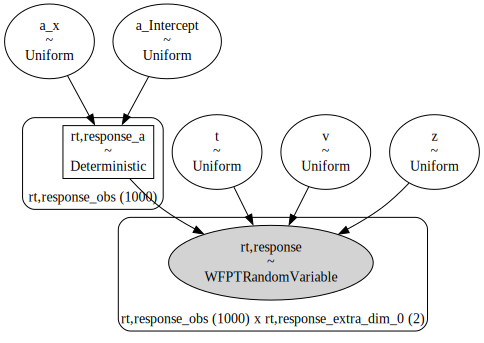

In [66]:
hssm_include_val.graph()

In [67]:
samples_three = hssm_include_val.sample(draws=500, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, v, a_Intercept, a_x]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 452 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


In [68]:
az.summary(samples_three)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
z,0.554,0.067,0.438,0.601,0.033,0.025,4.0,4.0,5.563132e+15
t,1.006,0.190,0.709,1.213,0.094,0.072,4.0,4.0,5.867876e+15
v,-0.116,0.544,-1.045,0.324,0.270,0.206,4.0,4.0,5.867876e+15
a_Intercept,0.354,0.163,0.235,0.636,0.081,0.062,4.0,4.0,5.867876e+15
a_x,0.129,0.064,0.058,0.218,0.032,0.024,4.0,4.0,5.867876e+15
...,...,...,...,...,...,...,...,...,...
"rt,response_a[995]",0.400,0.181,0.289,0.713,0.090,0.069,4.0,4.0,5.867876e+15
"rt,response_a[996]",0.396,0.180,0.287,0.707,0.089,0.068,4.0,4.0,5.867876e+15
"rt,response_a[997]",0.401,0.181,0.289,0.714,0.090,0.069,4.0,4.0,5.563132e+15
"rt,response_a[998]",0.406,0.184,0.292,0.724,0.091,0.070,4.0,4.0,5.867876e+15


#### Case 4, including multiple dictionaries in the include parameter. Creating hierarchical model. 

In [69]:
hssm_include_list = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "v ~ 1 + x + y",
        },
        {
            "name": "a",
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -2.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
                "y": {"name": "Uniform", "lower": -0.50, "upper": 0.50},
            },
            "formula": "a ~ 1 + x + y",
        },
    ],
)

In [70]:
hssm_include_list.model

       Formula: c(rt, response) ~ 1 + x + y
                a ~ 1 + x + y
        Family: analytical
          Link: v = identity
                a = identity
  Observations: 1000
        Priors: 
    target = v
        Common-level effects
            Intercept ~ Uniform(lower: -2.0, upper: 3.0)
            x ~ Uniform(lower: -0.5, upper: 0.5)
            y ~ Uniform(lower: -0.5, upper: 0.5)
        
        Auxiliary parameters
            c(rt, response)_sv ~ 0.0
            c(rt, response)_z ~ Uniform(lower: 0.10000000149011612, upper: 0.8999999761581421)
            c(rt, response)_t ~ Uniform(lower: 0.0, upper: 2.0)
    target = a
        Common-level effects
            a_Intercept ~ Uniform(lower: -2.0, upper: 3.0)
            a_x ~ Uniform(lower: -0.5, upper: 0.5)
            a_y ~ Uniform(lower: -0.5, upper: 0.5)

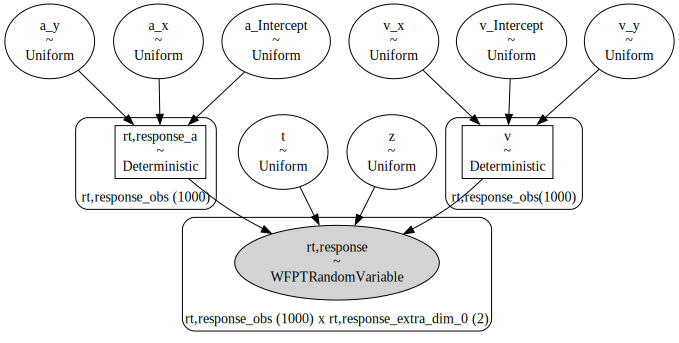

In [71]:
hssm_include_list.graph()

In [72]:
samples_two = hssm_include_list.sample(draws=100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, v_Intercept, v_x, v_y, a_Intercept, a_x, a_y]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 4 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 400 divergences after tuning. Increase `target_accept` or reparameterize.


#### Case 5. including multiple dictionaries in the include parameter. Specifying prior as a float number. 

In [73]:
hssm_include_list = hssm.HSSM(
    data=dataset_reg_v,
    include=[
        {
            "name": "v",  # change to name
            "prior": {
                "Intercept": {"name": "Uniform", "lower": -3.0, "upper": 3.0},
                "x": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
                "y": {"name": "Uniform", "lower": -2.0, "upper": 1.0},
            },
            "formula": "v ~ 1 + x + y",
        },
        {"name": "a", "prior": 0.5},
    ],
)

In [74]:
samples_three = hssm_include_list.sample(draws=100, tune=100)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, t, v_Intercept, v_x, v_y]


Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 4 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 400 divergences after tuning. Increase `target_accept` or reparameterize.
